In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [5]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_csv(r'D:\GIT posting projects\Project-PCOS-Prediction\relevat_data.csv')

In [7]:
df.head()

,PCOS,Total_Follicles,Skin_Hair,Metabolic_Score,High_LH
0,0,6,0,1,0
1,0,8,0,0,0
2,1,28,1,2,0
3,0,4,0,1,0
4,0,7,1,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   PCOS             539 non-null    int64
 1   Total_Follicles  539 non-null    int64
 2   Skin_Hair        539 non-null    int64
 3   Metabolic_Score  539 non-null    int64
 4   High_LH          539 non-null    int64
dtypes: int64(5)
memory usage: 21.2 KB


In [9]:
X = df[['High_LH', 'Skin_Hair', 'Metabolic_Score', 'Total_Follicles']]
y = df['PCOS']

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_scaled.shape

(539, 4)

In [12]:
data = pd.DataFrame(X_scaled, columns=['Total_Follicles', 'Skin_Hair', 'Metabolic_Score', 'High_LH'])
data['PCOS'] = y.values

In [13]:
x = data[['High_LH', 'Skin_Hair', 'Metabolic_Score', 'Total_Follicles']]
Y = data['PCOS']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42) 

In [15]:
pcos_counts = data['PCOS'].value_counts()
pcos_counts


PCOS
0    363
1    176
Name: count, dtype: int64

In [16]:
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_b, y_train_b = smote.fit_resample(X_train, y_train)

**Logistic Regression**

In [17]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_b, y_train_b)
y_pred_lr = lr_model.predict(X_test)

In [18]:
y_pred_lr = lr_model.predict(X_test)

In [19]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
print('Logistic Regression Metrics')
print(classification_report(y_test, y_pred_lr))

Logistic Regression Metrics
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        80
           1       0.73      0.79      0.76        28

    accuracy                           0.87       108
   macro avg       0.83      0.84      0.84       108
weighted avg       0.87      0.87      0.87       108



In [20]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
print(f"TN: {cm_lr[0,0]}, FP: {cm_lr[0,1]}, FN: {cm_lr[1,0]}, TP: {cm_lr[1,1]}")

[[72  8]
 [ 6 22]]
TN: 72, FP: 8, FN: 6, TP: 22


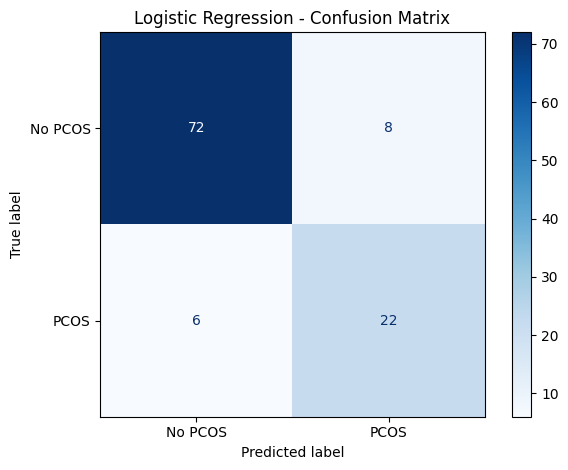

In [21]:

disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['No PCOS', 'PCOS'])
disp_lr.plot(cmap='Blues', values_format='d')
plt.title('Logistic Regression - Confusion Matrix')
plt.tight_layout()
plt.show()

**Decision Tree**

In [22]:
dt_model = DecisionTreeClassifier(random_state=42,
                                  max_depth=5,
                                  min_samples_split=10,
                                  min_samples_leaf=5)

In [23]:
dt_model.fit(X_train_b, y_train_b)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [24]:
y_pred_dt = dt_model.predict(X_test)

In [25]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
print('Decision Tree Metrics')
print(classification_report(y_test, y_pred_dt))

Decision Tree Metrics
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        80
           1       0.77      0.71      0.74        28

    accuracy                           0.87       108
   macro avg       0.84      0.82      0.83       108
weighted avg       0.87      0.87      0.87       108



In [26]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
print(f"TN: {cm_dt[0,0]}, FP: {cm_dt[0,1]}, FN: {cm_dt[1,0]}, TP: {cm_dt[1,1]}")

[[74  6]
 [ 8 20]]
TN: 74, FP: 6, FN: 8, TP: 20


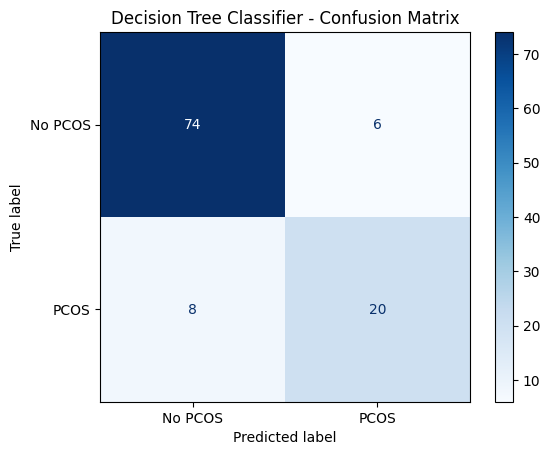

In [27]:
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['No PCOS', 'PCOS'])
disp_dt.plot(cmap='Blues', values_format='d')
plt.title('Decision Tree Classifier - Confusion Matrix')
plt.show()

**Random Forest Classifier**

In [28]:
rf_model = RandomForestClassifier(n_estimators=100,
                                  random_state=42,
                                  max_depth=5,
                                  min_samples_split=20,
                                  min_samples_leaf=10,
                                  max_features=1)

In [29]:
rf_model.fit(X_train_b, y_train_b)

RandomForestClassifier(max_depth=5, max_features=1, min_samples_leaf=10,
                       min_samples_split=20, random_state=42)

In [30]:
y_pred_rf = rf_model.predict(X_test)

In [31]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
print('Random Forest Metrics')
print(classification_report(y_test, y_pred_rf))

Random Forest Metrics
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        80
           1       0.70      0.75      0.72        28

    accuracy                           0.85       108
   macro avg       0.81      0.82      0.81       108
weighted avg       0.86      0.85      0.85       108



In [32]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
print(f"TN: {cm_rf[0,0]}, FP: {cm_rf[0,1]}, FN: {cm_rf[1,0]}, TP: {cm_rf[1,1]}")

[[71  9]
 [ 7 21]]
TN: 71, FP: 9, FN: 7, TP: 21


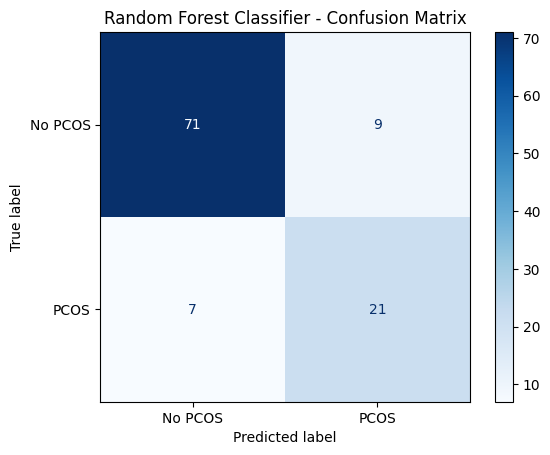

In [33]:
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No PCOS', 'PCOS'])
disp_rf.plot(cmap='Blues', values_format='d')
plt.title('Random Forest Classifier - Confusion Matrix')
plt.show()

**XGBOOST**

In [34]:
x_model = XGBClassifier(random_state = 42, eval_metric = 'logloss')

In [35]:
x_model.fit(X_train_b, y_train_b)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [48]:
y_pred_x = x_model.predict(X_test)
y_pred_x_train = x_model.predict(X_train_b)

In [50]:
print("Test:")

accuracy_x = accuracy_score(y_test, y_pred_x)
f1_score_x = f1_score(y_test, y_pred_x)
precision_x = precision_score(y_test, y_pred_x)
recall_x = recall_score(y_test, y_pred_x)
print('XGBoost Metrics')
print(classification_report(y_test, y_pred_x))


print("Train:")

accuracy_x = accuracy_score(y_train_b, y_pred_x_train)
f1_score_x = f1_score(y_train_b, y_pred_x_train)
precision_x = precision_score(y_train_b, y_pred_x_train)
recall_x = recall_score(y_train_b, y_pred_x_train)
print('XGBoost Metrics')
print(classification_report(y_train_b, y_pred_x_train))


Test:
XGBoost Metrics
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        80
           1       0.85      0.82      0.84        28

    accuracy                           0.92       108
   macro avg       0.90      0.89      0.89       108
weighted avg       0.92      0.92      0.92       108

Train:
XGBoost Metrics
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       283
           1       0.95      0.95      0.95       283

    accuracy                           0.95       566
   macro avg       0.95      0.95      0.95       566
weighted avg       0.95      0.95      0.95       566



In [38]:
cm_x = confusion_matrix(y_test, y_pred_x)
print(cm_x)
print(f"TN: {cm_x[0,0]}, FP: {cm_x[0,1]}, FN: {cm_x[1,0]}, TP: {cm_x[1,1]}")

[[76  4]
 [ 5 23]]
TN: 76, FP: 4, FN: 5, TP: 23


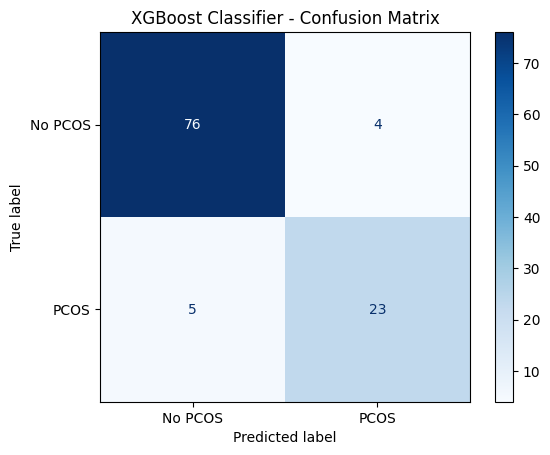

In [39]:
disp_x = ConfusionMatrixDisplay(confusion_matrix=cm_x, display_labels=['No PCOS', 'PCOS'])
disp_x.plot(cmap='Blues', values_format='d')
plt.title('XGBoost Classifier - Confusion Matrix')
plt.show()

**SVM**

In [40]:
svm_model = SVC(random_state=42, probability=True)

In [41]:
svm_model.fit(X_train_b, y_train_b)

SVC(probability=True, random_state=42)

In [42]:
y_pred_svm = svm_model.predict(X_test)

In [43]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_score_svm= f1_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm= recall_score(y_test, y_pred_svm)
print('SVM Metrics')
print(classification_report(y_test, y_pred_svm))

SVM Metrics
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        80
           1       0.76      0.79      0.77        28

    accuracy                           0.88       108
   macro avg       0.84      0.85      0.85       108
weighted avg       0.88      0.88      0.88       108



In [44]:
cm_svm = confusion_matrix(y_test, y_pred_x)
print(cm_svm)
print(f"TN: {cm_svm[0,0]}, FP: {cm_svm[0,1]}, FN: {cm_svm[1,0]}, TP: {cm_svm[1,1]}")

[[76  4]
 [ 5 23]]
TN: 76, FP: 4, FN: 5, TP: 23


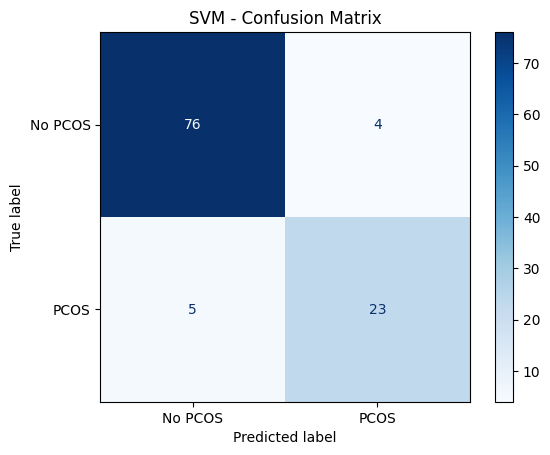

In [45]:
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['No PCOS', 'PCOS'])
disp_svm.plot(cmap='Blues', values_format='d')
plt.title('SVM - Confusion Matrix')
plt.show()

In [46]:
import joblib

# Save the XGBoost model
joblib.dump(x_model, 'pcos_xgboost_model.joblib')
print("✅ XGBoost model saved as 'pcos_xgboost_model.joblib'")

# Save the scaler (StandardScaler)
joblib.dump(scaler, 'scaler.joblib') 
print("✅ Scaler saved as 'scaler.joblib'")

✅ XGBoost model saved as 'pcos_xgboost_model.joblib'
✅ Scaler saved as 'scaler.joblib'
